In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
from matplotlib.font_manager import FontProperties
%matplotlib inline

# Tratamiento del tiempo
import time
from datetime import datetime, date

# Lectura del fichero resultante de la preparación, limpieza y transformación de los datos  

In [2]:
df_total = pd.read_csv('fraudTotal.csv')

Realizamos algunas comprobaciones para asegurarnos de que todo es correcto: 

In [3]:
df_total.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,Population_group,age,age_group,dif_long,dif_lat,distance_km,dist_km_group,hour,dayofweek,month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,<500K,35,[30-40),-0.015188,-0.001178,78.619775,[75-100 km),0,1,1
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,<500K,45,[40-50),0.000420,0.004734,30.220712,[25-50 km),0,1,1
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,<500K,61,[60-70),0.001877,0.016928,108.236654,[100-125 km),0,1,1
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,<500K,56,[50-60),-0.007806,0.014028,95.700262,[75-100 km),0,1,1
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,<500K,37,[30-40),0.014494,0.004438,77.578656,[75-100 km),0,1,1


In [4]:
print(df_total.shape)

(1852394, 33)


In [5]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

# Análisis univariante

## Histogramas de todas las variables numéricas

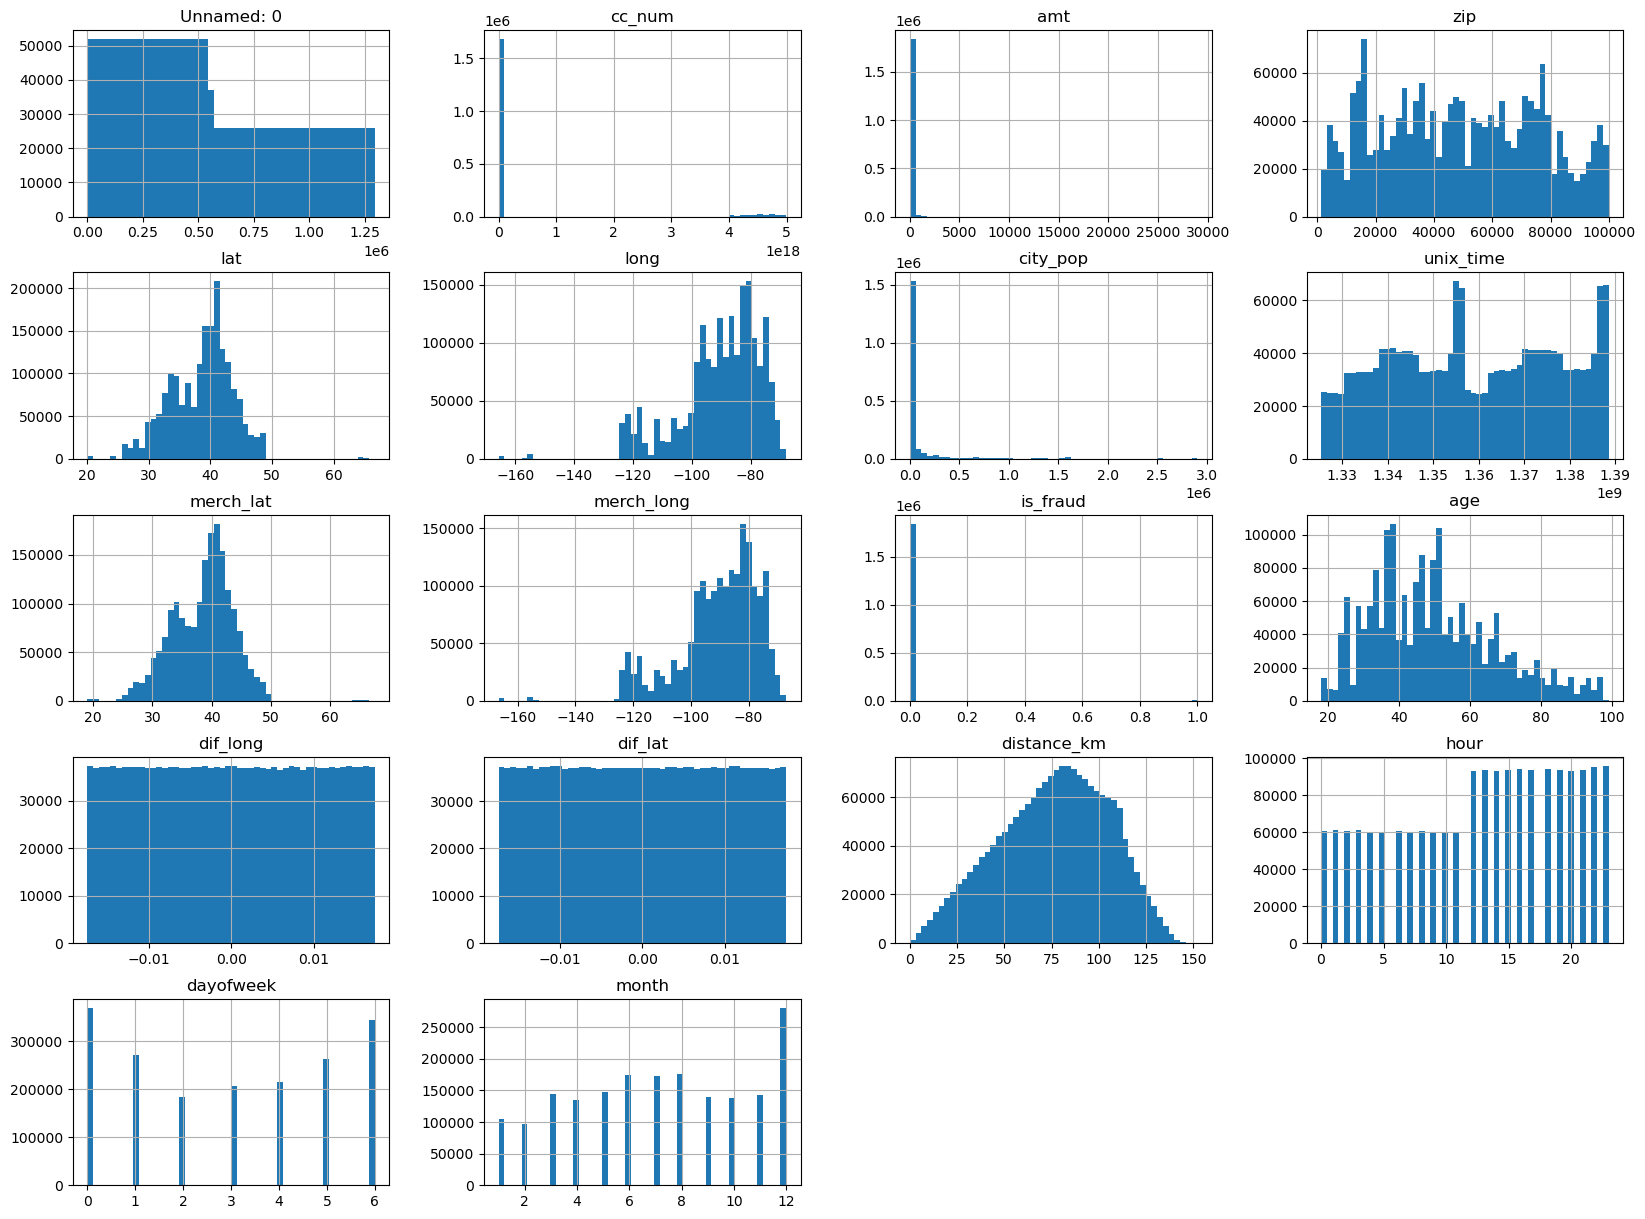

In [6]:
df_total.hist(bins=50, figsize=(20,15))
plt.show;

## Diagramas de barras de las variables categóricas interesantes para el análisis del fraude

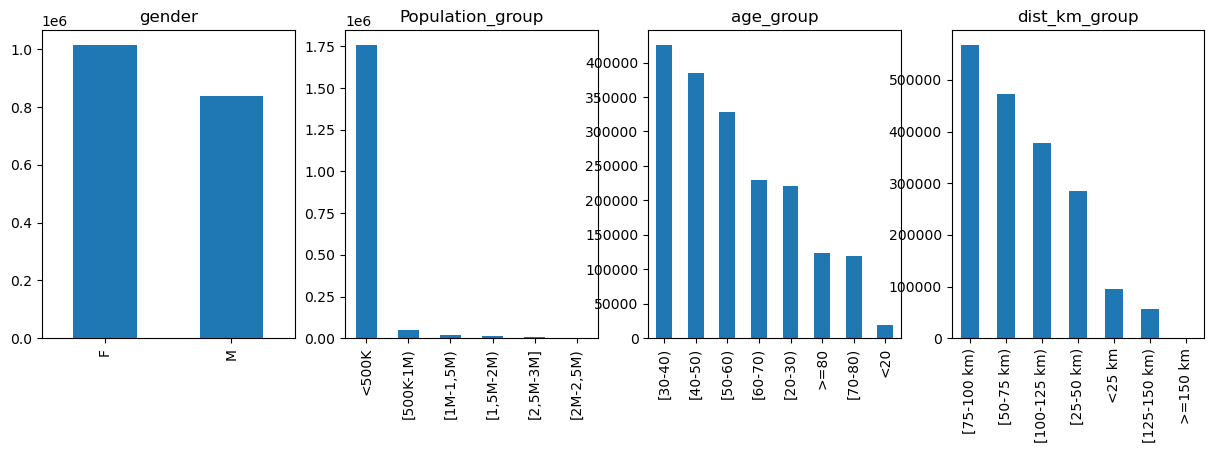

In [32]:
# Obtener la lista de variables categóricas
categorical_columns = ['gender', 'Population_group', 
                       'age_group', 'dist_km_group']


fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(15,4))

for col, ax in zip(df_total[categorical_columns], axes.ravel()):
    df_total[col].value_counts().plot.bar(ax=ax)
    ax.set_title(col)

plt.show();

## Variable objetivo is_fraud

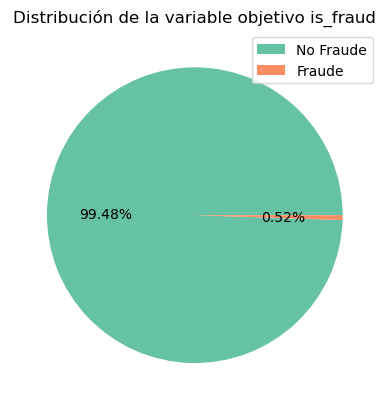

In [44]:
# Contar las ocurrencias de cada categoría
fraud_counts = df_total['is_fraud'].value_counts()

# Crear el gráfico con porcentajes
plt.pie(fraud_counts, autopct='%1.2f%%', startangle=0, colors=['#66c2a5', '#fc8d62'], textprops={'color': 'black'})

# Añadir leyenda
plt.legend(['No Fraude', 'Fraude'], loc='upper right')

# Añadir título
plt.title('Distribución de la variable objetivo is_fraud')

# Mostrar el gráfico
plt.show()

# Análisis bivariante 

## Importe medio de las transacciones fraudulentas y no fraudulentas

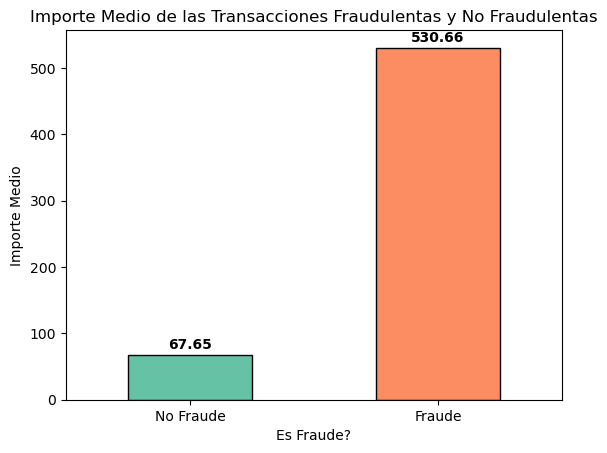

In [38]:
# Calcular las medias
fraud_mean = df_total.groupby('is_fraud')['amt'].mean()
fraud_mean_labels = [f'{val:.2f}' for val in fraud_mean]

# Crear el gráfico de barras
ax = fraud_mean.plot(kind='bar', color=['#66c2a5', '#fc8d62'], edgecolor='black')

# Agregar etiquetas y título
ax.set_xticklabels(['No Fraude', 'Fraude'], rotation=0)
ax.set_xlabel('Es Fraude?')
ax.set_ylabel('Importe Medio')
ax.set_title('Importe Medio de las Transacciones Fraudulentas y No Fraudulentas')

# Agregar medias sobre las barras
for i, v in enumerate(fraud_mean_labels):
    ax.text(i, fraud_mean[i] + 5, v, ha='center', va='bottom', color='black', fontweight='bold')

# Mostrar el gráfico
plt.show()

## Fraude por género

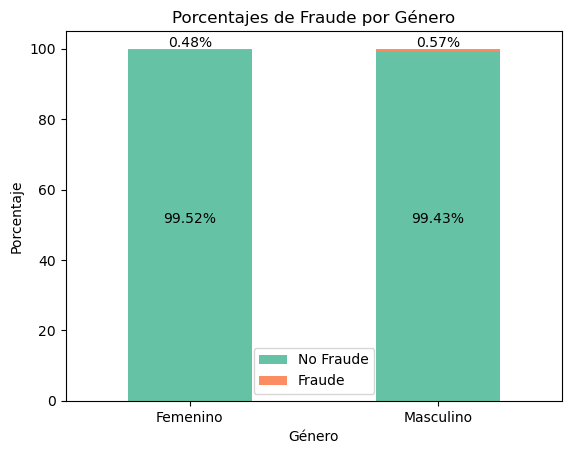

In [41]:
gen_counts = df_total.groupby(['gender','is_fraud'])['is_fraud'].count().unstack()
gen_counts.columns = ['No Fraude', 'Fraude']
gen_percentages = gen_counts.div(gen_counts.sum(axis=1), axis=0) * 100
#ax = gen_counts.plot(kind='bar', stacked=True, color=['green', 'red'])

# Construir gráfico de barras
ax = gen_percentages.plot(kind='bar', stacked=True, color=['#66c2a5', '#fc8d62'])
ax.set_xticklabels(['Femenino', 'Masculino'], rotation=0)

# Personalizar leyenda
ax.legend(['No Fraude', 'Fraude'])

# Etiquetas y título
ax.set_xlabel('Género')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentajes de Fraude por Género')

# Desactivar formato exponencial en el eje y
plt.ticklabel_format(style='plain', axis='y')

# Mostrar porcentajes en las barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width / 2, y + height / 2), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.show()

## Fraude por grupo de edad

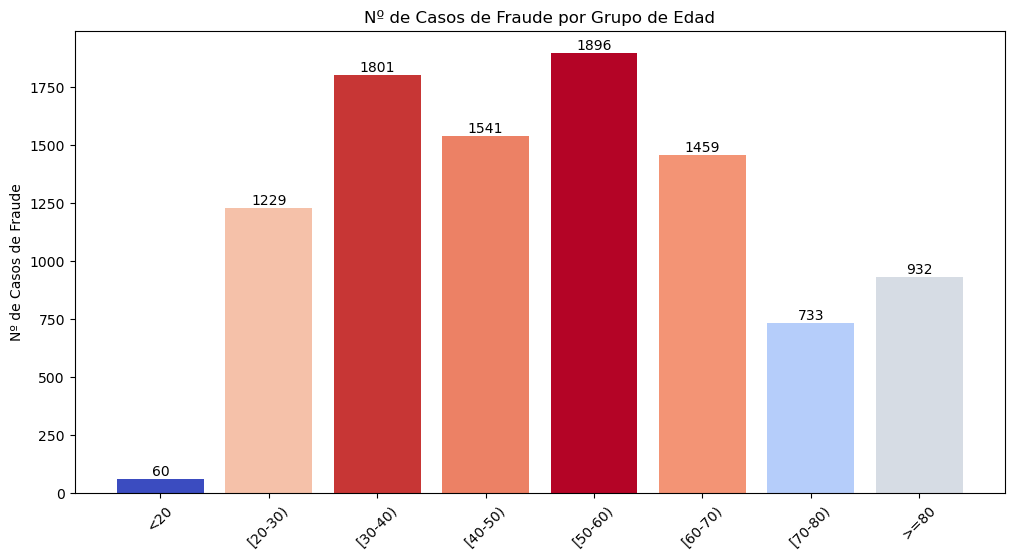

In [91]:
fraud_by_age = df_total[df_total['is_fraud'] == 1].groupby('age_group')['is_fraud'].count()

# Ordenar los datos por la etiqueta del grupo de edad
fraud_by_age = fraud_by_age.reindex(['<20', '[20-30)', '[30-40)','[40-50)', '[50-60)','[60-70)', '[70-80)', '>=80'])

# Normalizar las frecuencias para utilizarlas como intensidades en la paleta de colores
normalized_frequencies = (fraud_by_age - fraud_by_age.min()) / (fraud_by_age.max() - fraud_by_age.min())

# Seleccionar un mapa de colores
colormap = plt.cm.coolwarm

# Crear el gráfico de barras con una paleta de colores
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(fraud_by_age.index, fraud_by_age, color=colormap(normalized_frequencies))

# Mostrar las frecuencias sobre las barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Etiquetas y título
plt.ylabel('Nº de Casos de Fraude')
plt.title('Nº de Casos de Fraude por Grupo de Edad')
plt.xticks(rotation=45)
plt.show()

## Fraude por día de la semana

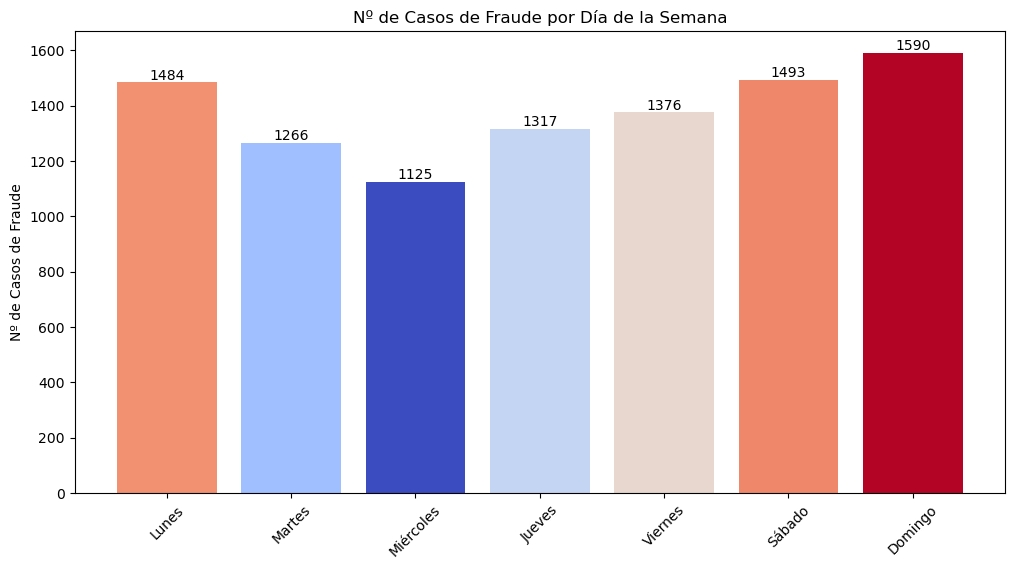

In [82]:
fraud_by_day = df_total[df_total['is_fraud'] == 1].groupby('dayofweek')['is_fraud'].count()
day_labels = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
fraud_by_day.index = day_labels

# Normalizar las frecuencias para utilizarlas como intensidades en la paleta de colores
normalized_frequencies = (fraud_by_day - fraud_by_day.min()) / (fraud_by_day.max() - fraud_by_day.min())

# Seleccionar un mapa de colores
colormap = plt.cm.coolwarm

# Crear el gráfico de barras con una paleta de colores
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(fraud_by_day.index, fraud_by_day, color=colormap(normalized_frequencies))

# Mostrar las frecuencias sobre las barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Etiquetas y título
plt.ylabel('Nº de Casos de Fraude')
plt.title('Nº de Casos de Fraude por Día de la Semana')
plt.xticks(rotation=45)
plt.show()

## Fraude por horas

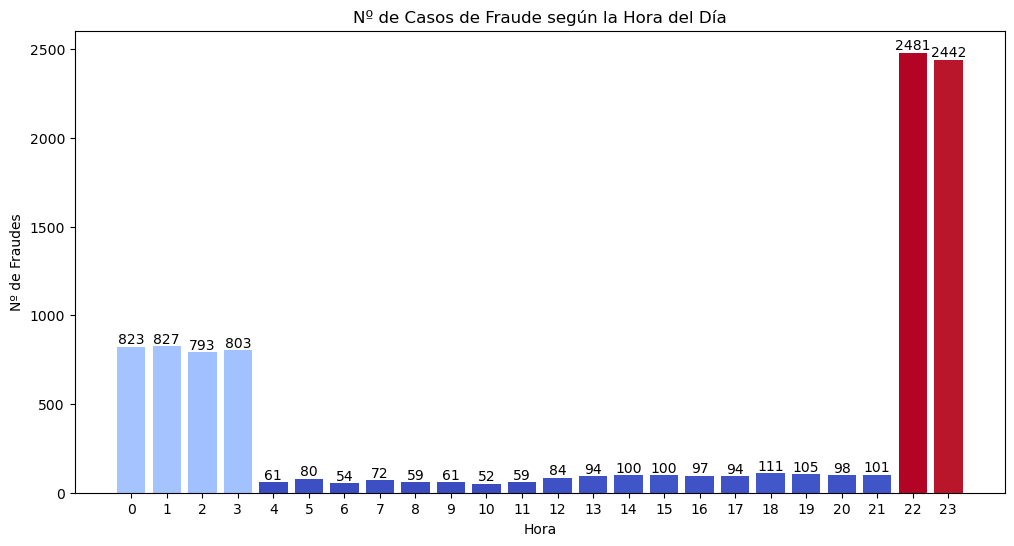

In [58]:
# Calcular las frecuencias
df_horas = df_total[df_total['is_fraud'] == 1].groupby('hour')['is_fraud'].count()

# Normalizar las frecuencias para utilizarlas como intensidades en la paleta de colores
normalized_frequencies = (df_horas - df_horas.min()) / (df_horas.max() - df_horas.min())

# Seleccionar un mapa de colores
colormap = plt.cm.coolwarm

# Crear el gráfico de barras con una paleta de colores
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df_horas.index, df_horas, color=colormap(normalized_frequencies))

# Añadir etiquetas y título
ax.set_xlabel('Hora')
ax.set_ylabel('Nº de Fraudes')
ax.set_title('Nº de Casos de Fraude según la Hora del Día')

# Añadir las frecuencias sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Mostrar todas las horas en el eje x
plt.xticks(df_horas.index)

# Mostrar el gráfico
plt.show()

## Fraude por meses

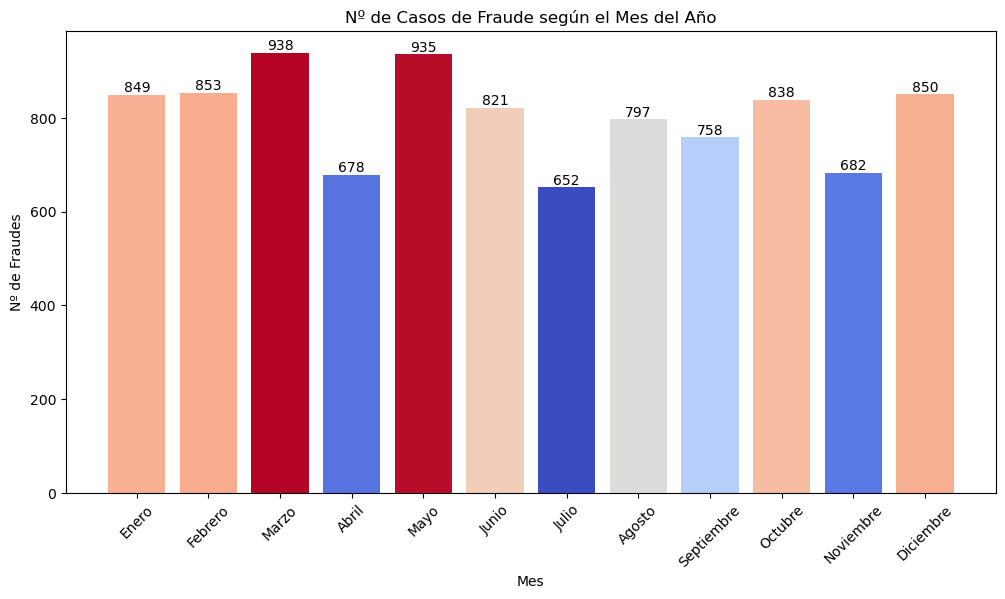

In [81]:
# Calcular las frecuencias
df_meses = df_total[df_total['is_fraud'] == 1].groupby('month')['is_fraud'].count()
month_labels = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
                'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
df_meses.index = month_labels

# Normalizar las frecuencias para utilizarlas como intensidades en la paleta de colores
normalized_frequencies = (df_meses - df_meses.min()) / (df_meses.max() - df_meses.min())

# Seleccionar un mapa de colores
colormap = plt.cm.coolwarm

# Crear el gráfico de barras con una paleta de colores
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df_meses.index, df_meses, color=colormap(normalized_frequencies))

# Añadir etiquetas y título
ax.set_xlabel('Mes')
ax.set_ylabel('Nº de Fraudes')
ax.set_title('Nº de Casos de Fraude según el Mes del Año')

# Añadir las frecuencias sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Mostrar todos los meses en el eje x
plt.xticks(df_meses.index)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

## Fraude por tramo de población

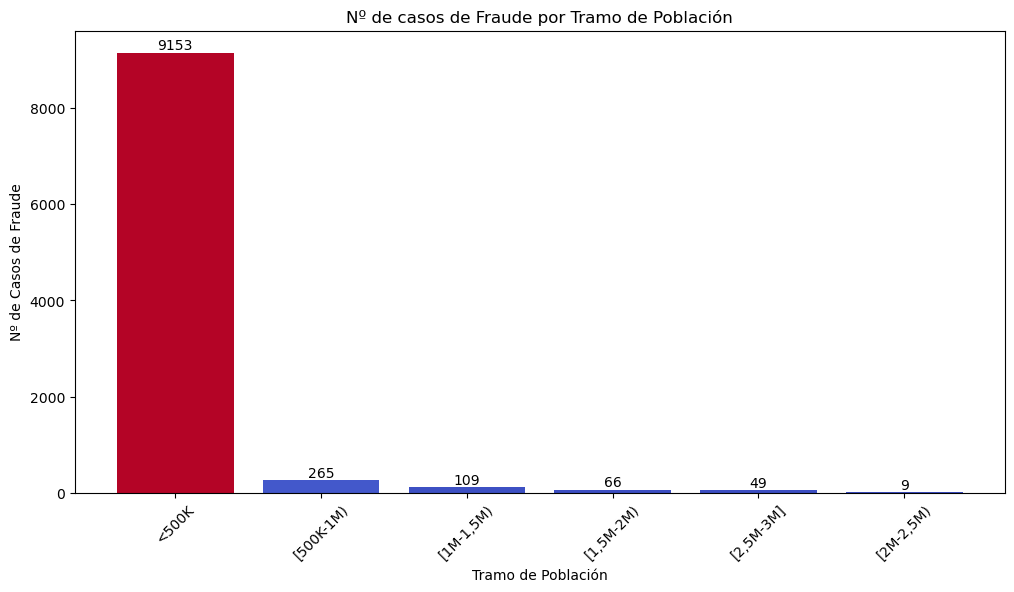

In [93]:
df_popul = df_total[df_total['is_fraud'] == 1].groupby('Population_group')['is_fraud'].count()
population_group = df_popul.sort_values(ascending=False)

# Normalizar las frecuencias para utilizarlas como intensidades en la paleta de colores
normalized_frequencies = (population_group - population_group.min()) / (population_group.max() - population_group.min())

# Seleccionar un mapa de colores
colormap = plt.cm.coolwarm

# Crear el gráfico de barras con una paleta de colores
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(population_group.index, population_group, color=colormap(normalized_frequencies))

# Mostrar las frecuencias sobre las barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Etiquetas y título
plt.xlabel('Tramo de Población')
plt.ylabel('Nº de Casos de Fraude')
plt.title('Nº de casos de Fraude por Tramo de Población')
plt.xticks(rotation=45)
plt.show()

## Fraude por distancia entre cliente y comerciante

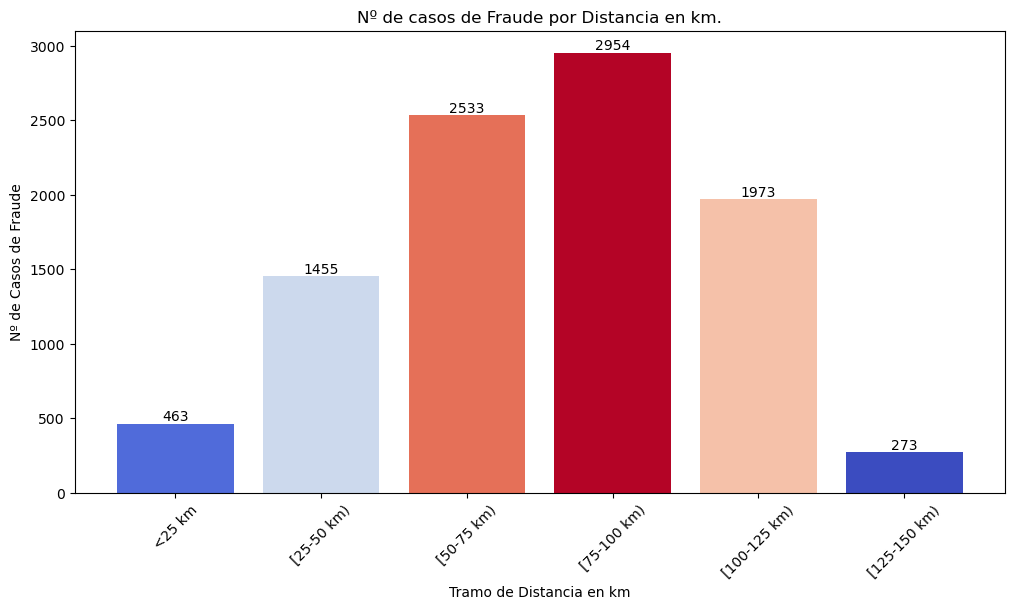

In [98]:
df_distance = df_total[df_total['is_fraud'] == 1].groupby('dist_km_group')['is_fraud'].count()

# Ordenar los datos por la etiqueta del grupo de edad
distance_group = distance_group.reindex(['<25 km', '[25-50 km)', '[50-75 km)','[75-100 km)', '[100-125 km)',
                                         '[125-150 km)'])

# Normalizar las frecuencias para utilizarlas como intensidades en la paleta de colores
normalized_frequencies = (distance_group - distance_group.min()) / (distance_group.max() - distance_group.min())

# Seleccionar un mapa de colores
colormap = plt.cm.coolwarm

# Crear el gráfico de barras con una paleta de colores
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(distance_group.index, distance_group, color=colormap(normalized_frequencies))

# Mostrar las frecuencias sobre las barras
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Etiquetas y título
plt.xlabel('Tramo de Distancia en km')
plt.ylabel('Nº de Casos de Fraude')
plt.title('Nº de casos de Fraude por Distancia en km.')
plt.xticks(rotation=45)
plt.show()

## Geolocalización de los clientes y comerciantes

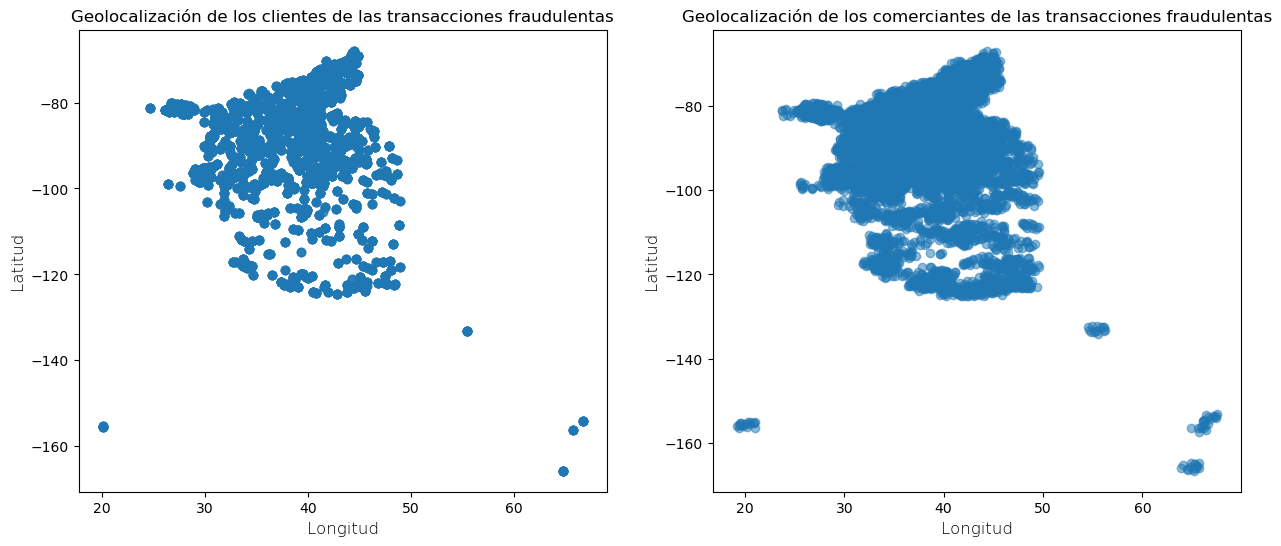

In [77]:
fraud_data = df_total[df_total['is_fraud']==1]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(fraud_data['lat'], fraud_data['long'], alpha = 0.5)
plt.title('Geolocalización de los clientes de las transacciones fraudulentas')
plt.xlabel('Longitud', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel('Latitud', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.subplot(1,2,2)
plt.scatter(fraud_data['merch_lat'], fraud_data['merch_long'], alpha = 0.5)
plt.title('Geolocalización de los comerciantes de las transacciones fraudulentas')
plt.xlabel('Longitud', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel('Latitud', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})

plt.show();